# We will first import a pre processed 1797 hand writeen digits into our programm
### We can have our own data also, but we are using pre-loaded data to save time,

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()

#to make plots in  this notebook, without opening any external window
%matplotlib inline 
digits.data[:1000].shape
type(digits.data)

numpy.ndarray

7
[[  0.   0.   3.  11.  16.  13.   0.   0.]
 [  0.   3.  15.  15.  13.  16.   0.   0.]
 [  0.   6.   8.   2.   9.  14.   0.   0.]
 [  0.   0.   4.   7.  15.  14.   5.   0.]
 [  0.   4.  16.  16.  16.  14.   6.   0.]
 [  0.   1.   8.  13.  12.   0.   0.   0.]
 [  0.   0.   1.  16.   4.   0.   0.   0.]
 [  0.   0.   3.  15.   1.   0.   0.   0.]]


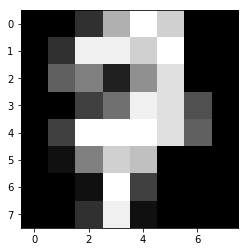

In [44]:
print( digits.target[112] )
print( digits.data[112].reshape(8,8) )
plt.imshow(digits.data[112].reshape(8,8),cmap="gray")

Press Esc button and then M to input sentences like this

In [17]:
digits.data[5].reshape(8,8)
digits.target[123]

8

#### Now we will see in what shape our data is, (which is 1797 digit, with image already converted to numpy array, and preprocessad of all noise )

In [18]:

print("Shape of our feature, ie. our 8*8 pixels forming an image of digit : " + str(digits.data.shape) )

print("Shape of our Label, ie, the target data : " + str( digits.target.shape) )

Shape of our feature, ie. our 8*8 pixels forming an image of digit : (1797, 64)
Shape of our Label, ie, the target data : (1797,)


In [10]:
# we will import numpy for numerical and array llike computation
# we will import matplotlib for plotting graphs and images.
import numpy as np 
import matplotlib.pyplot as plt

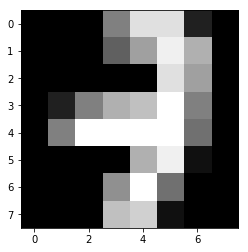

In [63]:
#meshgrid in numpy
h = digits.data[27].reshape(8,-1)
plt.imshow(h,cmap="gray")

### Now we will show some image of the digits, so that we know how it looks,
### The data set we have loaded is in very low pixel density, just to prove how strong our prediction can be, even when digits are not of goodd quality

0


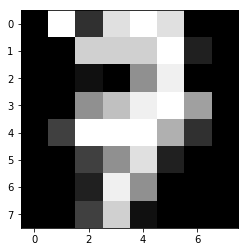

In [65]:
plt.figure(figsize=(20,4)) 
image = digits.data[81].reshape(8,8)
image[0,1] = 16
#image = np.reshape(image, (8,8) )
plt.imshow(image,cmap="gray")
print(digits.target[-81])

In [69]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

### As we always do , we split our data into, two parts, some pair of x,y into train and some pair of test

In [72]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = digits.data[:1346] , digits.data[1346:] , digits.target[:1346], digits.target[1346:]
x_train, x_test, y_train, y_test = \
train_test_split(X, y, test_size=0.25, random_state=11115)

2


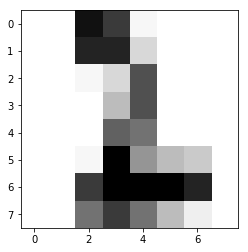

In [73]:
plt.figure(figsize=(20,4)) 
image = x_train[112].reshape(8,8)
#image = np.reshape(image, (8,8) )
plt.imshow(image,cmap="Greys")
print(y_train[112])

# Logistic Regression Model


### We import our logistic model now, and we fit our data into that model to be predicted when needed, or just to test

In [74]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
our_prediction = logisticRegr.predict(x_test[26:46])
print ("Our Prediction : ", our_prediction)
y_test[26:46]


Our Prediction :  [2 9 2 4 8 1 6 2 0 7 1 9 6 3 4 5 5 3 3 8]


array([2, 9, 2, 4, 8, 1, 6, 2, 0, 7, 1, 9, 6, 3, 4, 5, 5, 3, 3, 8])

In [79]:
logisticRegr.score(x_test[:],y_test)

0.95999999999999996

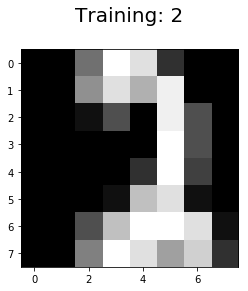

In [90]:
#plotting our data
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.title('Training: %i\n' % y_test[18], fontsize = 20)
plt.imshow(np.reshape(x_test[18], (8,8)), cmap=plt.cm.gray)

[9 0 4 6 8 7 1 8 7 9 8 0 4 9 3 8 7 6 7 2 1 9 3 1 2 8 6 4 8 4]
[9 0 4 6 8 7 1 8 7 9 8 0 4 9 3 8 7 6 7 2 8 9 3 1 2 8 6 4 8 4]


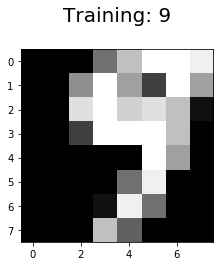

In [104]:
print(logisticRegr.predict(x_test[30:60]) )
print ( y_test[30:60] )

plt.figure(figsize=(20,4))
plt.subplot(1, 5, 1)
plt.title('Training: %i\n' % y_test[0], fontsize = 20)
plt.imshow(np.reshape(x_test[0], (8,8)), cmap=plt.cm.gray)

## DIY : Try your hands now in plotting all the predicted values, into subplots, and see if some ddigit was wrongly predicted

In [105]:
#predicting on all dataset
predictions = logisticRegr.predict(x_test)

In [106]:
#Testing scores now
score = logisticRegr.score(x_test, y_test)

In [107]:
print(score)

0.9622222222222222


## Our Accuracy now gives us only 96%, we will now go ahead and try to do it with knn

### In your time, do try to make confusion matrix and see how many got wrong, and which digit was hard to predict,
### and also try plot all those digits which were wrong, (using a for loop)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
knn.fit(x_train[:1000], y_train[:1000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
print(x_train.shape)
print(y_train.shape)

(1347, 64)
(1347,)


## As we did plotting above, DIY the same thing we tried earlier

In [56]:
print( knn.predict(x_test[0:40]) )
print( y_test[0:40] )
# we will see if the ooutput of our some test data sample are same as logistic prediction or not

[5 2 5 5 5 3 2 2 3 5 9 8 7 7 1 1 5 7 0 4 5 9 0 2 1 3 4 7 5 2 1 1 2 9 8 1 4
 5 7 9]
[5 2 5 5 5 3 2 2 3 5 9 8 7 2 1 1 5 7 0 4 5 9 0 2 1 3 4 7 5 2 1 1 2 9 8 1 4
 5 4 9]


In [57]:
print( knn.score(x_test, y_test) )

0.9866666666666667


# Confusion Matrix
## To see which digits of our were more tricky to predict

In [110]:
# we import seaborn library, which is based on matplotlib
## which inturn is based on matlab like plotting
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

from sklearn import metrics

In [111]:
#making a matrix of confusion matrix
predictions = knn.predict(digits.data)
cm = metrics.confusion_matrix(digits.target, predictions)
print (cm)

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 176   0   0   0   0   1   0   0]
 [  0   0   0 181   0   0   0   2   0   0]
 [  0   0   0   0 180   0   0   1   0   0]
 [  0   0   0   0   0 179   1   0   0   2]
 [  0   0   0   0   0   0 180   0   1   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   6   0   1   0   0   0   0 167   0]
 [  0   0   0   4   1   2   0   0   2 171]]


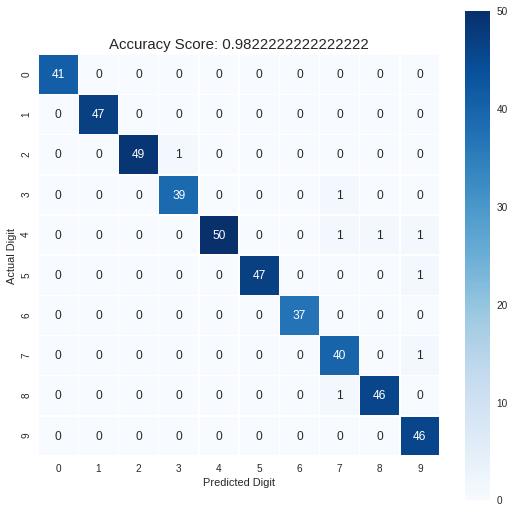

In [76]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual Digit');
plt.xlabel('Predicted Digit');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(x_test, y_test))
plt.title(all_sample_title, size = 15);

### Now as we have seen earlier how we makee subplot with indexing,  try to make two plots of confusion matrix of Logistic and KNN side by side

# If extra efforts counts,
## Above code can be beautifully presented as below,
### not necessarily a needed thing to do, but still

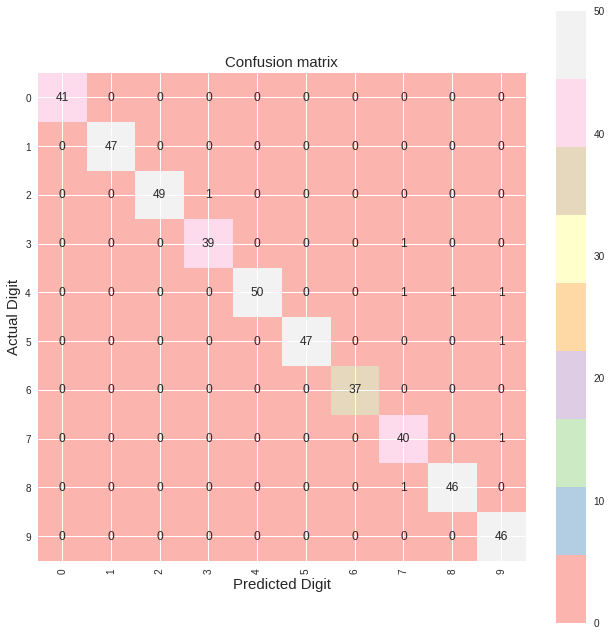

In [78]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))

plt.title('Confusion matrix', size = 15)
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')

plt.colorbar()

#making tick marks
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=90, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)


plt.tight_layout()
plt.ylabel('Actual Digit', size = 15)
plt.xlabel('Predicted Digit', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')